# 🦠🧪Covid-19 Vaccine Distribution 🧪🦠

Optimising a vaccine distribution plan for the UK in response to the Covid-19 virus.

### Import Packages and Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Polygon
from matplotlib.patches import Polygon as matPoly
import pandas as pd
import numpy as np
import pickle
from selenium import webdriver

In [2]:
infected = pd.read_excel('Data//Historic COVID-19 Dashboard Data.xlsx', sheet_name='UTLAs', skiprows=7)
deaths = pd.read_excel('Data//COVID-19-total-announced-deaths-10-April-2020.xlsx', sheet_name='COVID19 total deaths by trust', skiprows=15)

### Creating geo-objects for UK regions

Here we will use the Selenium package to get UK region polygon data from openstreetmap.

In [3]:
# Open Chrome client
driver = webdriver.Chrome(executable_path='/Users/newuser/Desktop/Programming/VaccineDistribution/chromedriver')

In [4]:
def get_poly_id(region):
    '''Returns the openstreetmap ID for a given region'''
    driver.get('https://nominatim.openstreetmap.org/')
    search_box = driver.find_element_by_id('q')
    search_box.send_keys(region)
    driver.find_element_by_class_name('btn-primary').click()
    driver.find_element_by_link_text('details').click()
    poly_id = driver.find_elements_by_xpath("//a[contains(@href, 'relation')]")[0].get_attribute("href").split('/')[-1]
    return(poly_id)
    
def get_poly(poly_id):
    '''Returns a list of lat/lon strings for a given openstreetmap ID'''
    driver.get('http://polygons.openstreetmap.fr/')
    search_box = driver.find_element_by_id('id')
    search_box.send_keys(poly_id)
    driver.find_elements_by_xpath("//input[@type='submit']")[0].click()
    poly_id = driver.find_elements_by_xpath("//a[contains(@href, 'get_poly')]")[0].click()
    texts = driver.find_element_by_tag_name("body").text.split('END')
    texts = [text.split('\n') for text in texts]
    polys = [[tuple(map(float,coord.lstrip(' ').split(' '))) for coord in t if len(coord.lstrip(' ').split(' ')) == 2] for t in texts[:-2]]
    return(polys)

We have commented out the following (Raw NBconvert) to stop it doing the scrape again. Just load in the pickle file.

In [5]:
with open('polygons.pkl', 'rb') as f:
    polygons = pickle.load(f)
print(f'Collected {len(polygons)} out of {len(infected)}')

Collected 151 out of 151


### Plotting UK regions

In [6]:
def draw_screen_poly( lats, lons, m, color):
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = matPoly( list(xy), facecolor=color , alpha=0.4 )
    plt.gca().add_patch(poly)

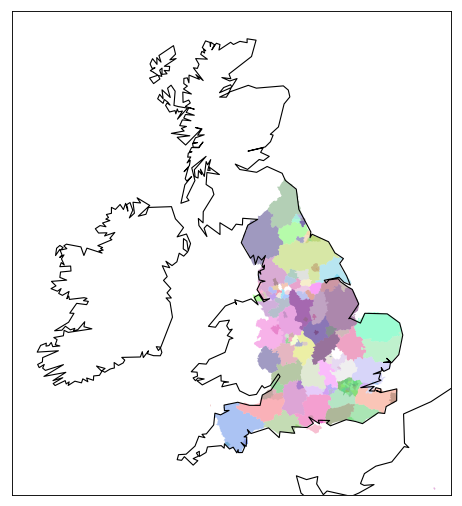

In [7]:
plt.figure(figsize=(12, 8), dpi=80)
m = Basemap(projection='gnom', lat_0=54.3, lon_0=-4, width=10e5, height=11e5, resolution='l')
m.drawcoastlines()

for P in polygons:
    if P == 'England ':
        continue
    for p in polygons[P]:
        lats = [i[1] for i in p]
        lons = [i[0] for i in p]
        draw_screen_poly( lats, lons, m , list(np.random.random(size=3)))

plt.show()